<a href="https://colab.research.google.com/github/sureshnaidugolla/myrepo/blob/GP/Testing%20the%20output_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import stuff

because gpCAM requires an older version of numpy, be sure to restart the notebook after initial installation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    from gpcam.autonomous_experimenter import AutonomousExperimenterFvGP
except:
    !pip install gpcam==8.0.2
    from gpcam.autonomous_experimenter import AutonomousExperimenterFvGP

try:
    import torch
except:
    !pip install torch
    import torch

### import custom module !! might be modified in the future !!
try:
    from gpcam_test_instrument import gpcam_test_instrument
except:
    !wget https://github.com/jcandane/StochasticPhysics/raw/main/gpcam_test_instrument.py
    from gpcam_test_instrument import gpcam_test_instrument

### import Noack's file on example kernels
try:
    from kernel_function import kernel_l2_single_task, kernel_l2_multi_task, kernel_l1, fvgp_kernel, non_stat_kernel_2d, symmetric_kernel, symmetric_kernel2, periodic_kernel_2d
except:
    !wget https://raw.githubusercontent.com/lbl-camera/gpCAM/master/examples/kernel_function.py
    from kernel_function import kernel_l2_single_task, kernel_l2_multi_task, kernel_l1, fvgp_kernel, non_stat_kernel_2d, symmetric_kernel, symmetric_kernel2, periodic_kernel_2d

# RCF for 5,10

In [ ]:

input_space   = np.array([[ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0]])

#x=np.asarray([np.array([[ 0.0, 10.0]]),np.array([[ 0.0, 10.0]]),np.array([[ 0.0, 10.0]]),np.array([[ 0.0, 10.0]]),np.array([[ 0.0, 10.0]])]) its not needed



import time
number_of_points = np.logspace(1.0, 3.0, num=20, base=10, dtype=int)
time_taken={} ## a dictionary storing the times as dict{ output_dim: { number_of_points: time_consumed } }
for i in range(1,11):
  f = gpcam_test_instrument(input_space, 15, D=i)
  temp={}
  for j in number_of_points:
    my_experiment = AutonomousExperimenterFvGP(f.domain,
                                              f.D, 1,
                                              init_dataset_size=10,
                                              instrument_function=f.test_instrumentt,
                                              kernel_function = kernel_l2_single_task,
                                              acquisition_function="variance")
    START = time.time()
    my_experiment.train()
    my_experiment.go(j)
    temp[j]=time.time() - START
    print(i,"--",j,"--",temp[j] )
  time_taken[i]=temp




In [ ]:

input_space   = np.array([[ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0],
                          [ 0.0, 10.0]])


import time
number_of_points = np.logspace(1.5, 2.0, num=2, base=10, dtype=int)
time_taken={} ## a dictionary storing the times as dict{ output_dim: { number_of_points: time_consumed } }
f = gpcam_test_instrument(input_space, 145, D=100000)
for j in number_of_points:
  my_experiment = AutonomousExperimenterFvGP(f.domain,
                                            f.D, 1,
                                            init_dataset_size=10,
                                            instrument_function=f.test_instrumentt,
                                            kernel_function = kernel_l2_single_task,
                                            acquisition_function="variance")
  START = time.time()
  my_experiment.train()
  my_experiment.go(j)
  temp[j]=time.time() - START
  print(i,"--",j,"--",temp[j] )
time_taken[i]=temp




In [ ]:
time_taken =[0.06949663162231445,0.2828025817871094,0.9768052101135254,1.658191442489624,0.8192753791809082,0.04544568061828613,0.0439910888671875,4.043833255767822
,0.04265165328979492
,0.043951988220214844
,15.073752164840698
,9.543031930923462
,24.347216606140137
,15.413974285125732
,24.724576950073242
,48.063135862350464
,53.95262145996094
,84.20009565353394
,105.87860369682312
,113.60126161575317
,0.04034900665283203
,0.5393931865692139
,2.729071855545044
,4.4600114822387695
,5.741626977920532
,10.00283694267273
,10.307653188705444
,18.859741687774658
,18.53334617614746
,25.794667959213257
,43.7010862827301
,26.040247678756714
,65.9315357208252
,101.93494606018066
,88.14138460159302
,91.19085097312927
,0.12598061561584473
,0.16046810150146484
,308.19370794296265
,197.9381926059723
,0.0931849479675293
,0.6192982196807861
,3.827665328979492
,0.23446154594421387
, 7.7485175132751465
,13.367026329040527
,7.858846187591553
,25.58539605140686
,0.1648082733154297
,32.24096989631653
,0.12810802459716797
,39.806995153427124
,0.22728252410888672
,69.05305576324463
,164.78463220596313
,198.98263812065125
,0.13272762298583984
,365.7639102935791
,192.83122873306274
,465.0751762390137
,0.09996366500854492
,0.8941934108734131
,0.7620706558227539
,0.17377114295959473
,5.8853600025177
,24.168981790542603
,31.990904569625854
,41.763277530670166
,22.448647499084473
,58.44696617126465
,74.23201537132263
,132.69095134735107
,62.32384371757507
,228.98757410049438
,294.7581536769867
,378.76584649086
,303.1616401672363
,525.8018460273743
,792.1758451461792
,1038.2844874858856
,0.10160493850708008
,1.6407785415649414
,8.802293062210083
,13.750759363174438
,9.826539278030396
,33.21306610107422
,24.80715823173523
,63.99449443817139
,88.16990423202515
,90.89225554466248
,151.8992669582367
,201.39512467384338
,137.91279554367065
,116.67618680000305
,413.6264989376068
,549.914121389389
,721.7698950767517
,929.744416475296
,1181.3841009140015
,1506.9817543029785
,0.12134623527526855
,0.1842942237854004
,10.271746158599854
,1.9140219688415527
,28.842582941055298
,42.72385621070862
,60.425596952438354
,60.30384802818298
,46.527177572250366
,97.62230491638184
,159.707537651062
,255.72566413879395
,280.84330129623413
,0.21537184715270996,518.9175369739532,718.4207382202148]


number_of_points = np.logspace(1.0, 3.0, num=20, base=10, dtype=int)
output_space=[i for i in range(1,11) ]

#print(time_taken))
print(number_of_points)
print(output_space)

[  10   12   16   20   26   33   42   54   69   88  112  143  183  233
  297  379  483  615  784 1000]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


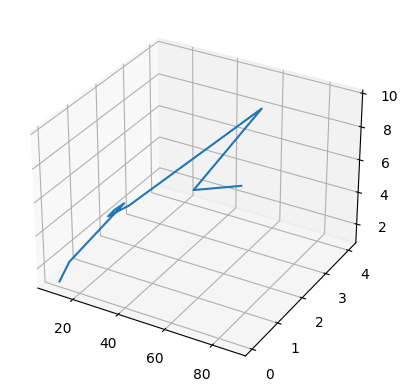

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
  plt.plot()

fig = plt.figure()
ax = plt.axes(projection='3d')

# defining all 3 axis
z = output_space
x = number_of_points[:10:]
y = time_taken[:10:]

# plotting
ax.plot3D(x, y, z,)
#ax.set_title('3D line plot geeks for geeks')
plt.show()


In [ ]:
import numpy as np
number_of_points = np.logspace(1.0, 3.0, num=20, base=10, dtype=int)
for i in number_of_points:
  print(i)

10
12
16
20
26
33
42
54
69
88
112
143
183
233
297
379
483
615
784
1000


In [ ]:

my_experiment.data.dataset

f.D

10